In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import Citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call. ** City Name goes after q= **
url = 'http://api.openweathermap.org/data/2.5/weather?'

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") + "&appid=" + weather_api_key
  
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-pierre
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | enshi
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | barranca
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | broken hill
Processing Record 9 of Set 1 | kuche
City not found. Skipping...
Processing Record 10 of Set 1 | korla
Processing Record 11 of Set 1 | havoysund
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 15 of Set 1 | tambul
City not found. Skipping...
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | hanyang
Processing Record 18 of Set 1 | peniche
Processing Record 19 of Set 1 | castro
Processing Record 20 of Se

Processing Record 34 of Set 4 | katsina
Processing Record 35 of Set 4 | luderitz
Processing Record 36 of Set 4 | neubrandenburg
Processing Record 37 of Set 4 | siyabuswa
Processing Record 38 of Set 4 | cherskiy
Processing Record 39 of Set 4 | sal rei
Processing Record 40 of Set 4 | altamont
Processing Record 41 of Set 4 | cartagena
Processing Record 42 of Set 4 | tuatapere
Processing Record 43 of Set 4 | zhezkazgan
Processing Record 44 of Set 4 | estelle
Processing Record 45 of Set 4 | bud
Processing Record 46 of Set 4 | terrace bay
Processing Record 47 of Set 4 | samusu
City not found. Skipping...
Processing Record 48 of Set 4 | prainha
Processing Record 49 of Set 4 | sukhinichi
Processing Record 50 of Set 4 | minot
Processing Record 1 of Set 5 | belyy yar
Processing Record 2 of Set 5 | wahpeton
Processing Record 3 of Set 5 | sabang
Processing Record 4 of Set 5 | carnduff
Processing Record 5 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 5 | mayor pablo

Processing Record 23 of Set 8 | esperance
Processing Record 24 of Set 8 | zonguldak
Processing Record 25 of Set 8 | kytlym
City not found. Skipping...
Processing Record 26 of Set 8 | egvekinot
Processing Record 27 of Set 8 | santa cruz
Processing Record 28 of Set 8 | priargunsk
Processing Record 29 of Set 8 | raudeberg
Processing Record 30 of Set 8 | piopio
Processing Record 31 of Set 8 | mikhaylovka
Processing Record 32 of Set 8 | sinnamary
Processing Record 33 of Set 8 | palatka
Processing Record 34 of Set 8 | haibowan
City not found. Skipping...
Processing Record 35 of Set 8 | bichura
Processing Record 36 of Set 8 | linchuan
City not found. Skipping...
Processing Record 37 of Set 8 | grindavik
Processing Record 38 of Set 8 | kota belud
Processing Record 39 of Set 8 | bueno brandao
Processing Record 40 of Set 8 | ati
Processing Record 41 of Set 8 | port lincoln
Processing Record 42 of Set 8 | codrington
Processing Record 43 of Set 8 | husavik
Processing Record 44 of Set 8 | inirida
P

Processing Record 9 of Set 12 | nuuk
Processing Record 10 of Set 12 | rocha
Processing Record 11 of Set 12 | hobyo
Processing Record 12 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 13 of Set 12 | the valley
Processing Record 14 of Set 12 | zharkent
Processing Record 15 of Set 12 | fort nelson
Processing Record 16 of Set 12 | juneau
Processing Record 17 of Set 12 | brokopondo
Processing Record 18 of Set 12 | vila velha
Processing Record 19 of Set 12 | svetlogorsk
Processing Record 20 of Set 12 | buala
Processing Record 21 of Set 12 | yuanping
Processing Record 22 of Set 12 | hualmay
Processing Record 23 of Set 12 | hareid
Processing Record 24 of Set 12 | isugod
Processing Record 25 of Set 12 | qaqortoq
Processing Record 26 of Set 12 | safaga
Processing Record 27 of Set 12 | yankton
Processing Record 28 of Set 12 | la tuque
Processing Record 29 of Set 12 | ucar
Processing Record 30 of Set 12 | chengde
Processing Record 31 of Set 12 | nawabganj
Processing Record 

In [10]:
len(city_data)

561

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Pierre,-21.3393,55.4781,300.97,78,75,1.03,RE,2022-01-21 04:40:48
1,Enshi,30.3000,109.4833,279.91,95,100,0.11,CN,2022-01-21 04:41:22
2,Hobart,-42.8794,147.3294,301.63,41,20,0.45,AU,2022-01-21 04:40:18
3,Barranca,-10.7500,-77.7667,294.77,85,98,3.32,PE,2022-01-21 04:41:23
4,Thompson,55.7435,-97.8558,255.24,71,100,4.12,CA,2022-01-21 04:40:39
5,Broken Hill,-31.9500,141.4333,303.99,33,94,10.80,AU,2022-01-21 04:41:23
6,Korla,41.7597,86.1469,273.99,36,37,2.24,CN,2022-01-21 04:41:23
7,Havoysund,70.9963,24.6622,272.28,56,100,11.29,NO,2022-01-21 04:41:24
8,Yellowknife,62.4560,-114.3525,251.71,81,100,9.26,CA,2022-01-21 04:37:07
9,Punta Arenas,-53.1500,-70.9167,286.21,67,0,3.09,CL,2022-01-21 04:38:18


In [12]:
# Establish new column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign new column order to data frame
city_data_reordered = city_data_df[new_column_order]

city_data_reordered.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Pierre,RE,2022-01-21 04:40:48,-21.3393,55.4781,300.97,78,75,1.03
1,Enshi,CN,2022-01-21 04:41:22,30.3000,109.4833,279.91,95,100,0.11
2,Hobart,AU,2022-01-21 04:40:18,-42.8794,147.3294,301.63,41,20,0.45
3,Barranca,PE,2022-01-21 04:41:23,-10.7500,-77.7667,294.77,85,98,3.32
4,Thompson,CA,2022-01-21 04:40:39,55.7435,-97.8558,255.24,71,100,4.12


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

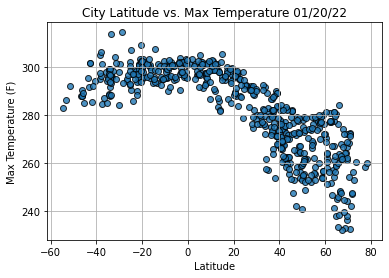

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

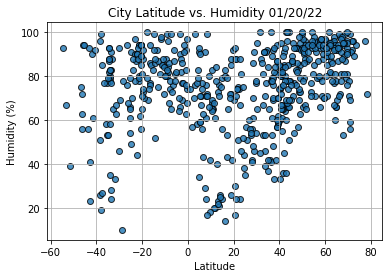

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

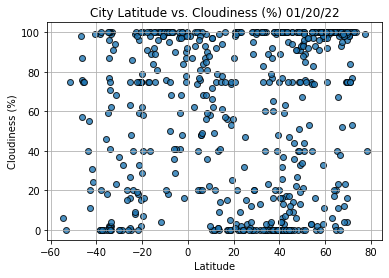

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

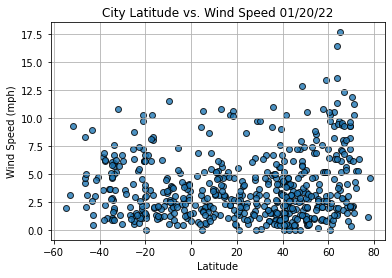

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:

# ** TO DO: Figure out if this is supposed to image.
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(lats, max_temps, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = lats * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(lats,max_temps)
    plt.plot(lats,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
    plt.xlabel('Latitude')
    plt.ylabel("Max Temperature (F)")
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                       Castro
Lat                      -24.7911
Lng                      -50.0119
Max Temp                   290.57
Humidity                       91
Cloudiness                     48
Wind Speed                   0.52
Country                        BR
Date          2022-01-21 04:36:00
Name: 13, dtype: object

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.head()
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Pierre,-21.3393,55.4781,300.97,78,75,1.03,RE,2022-01-21 04:40:48
2,Hobart,-42.8794,147.3294,301.63,41,20,0.45,AU,2022-01-21 04:40:18
3,Barranca,-10.7500,-77.7667,294.77,85,98,3.32,PE,2022-01-21 04:41:23
5,Broken Hill,-31.9500,141.4333,303.99,33,94,10.80,AU,2022-01-21 04:41:23
9,Punta Arenas,-53.1500,-70.9167,286.21,67,0,3.09,CL,2022-01-21 04:38:18


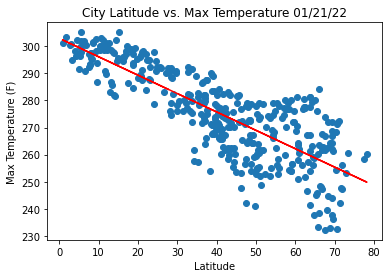

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

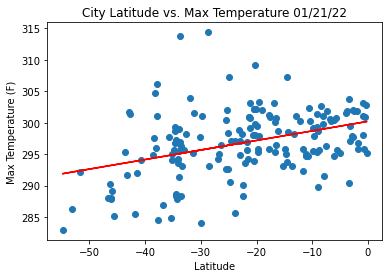

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

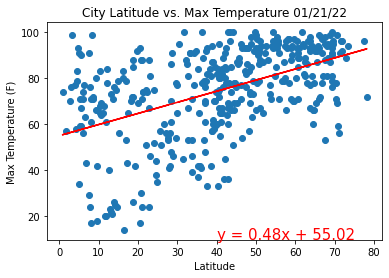

In [32]:
# To DO: Why didn't Title Update
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

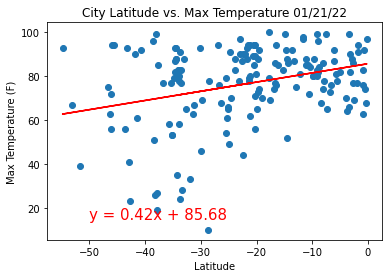

In [33]:
# To DO: Why didn't Title Update
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

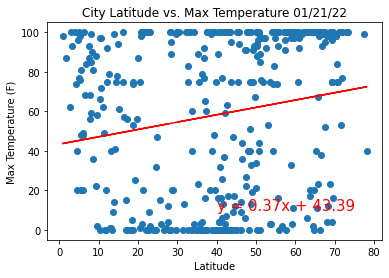

In [34]:
# To DO: Why didn't Title Update
# Skill Droll for Cloudiness
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

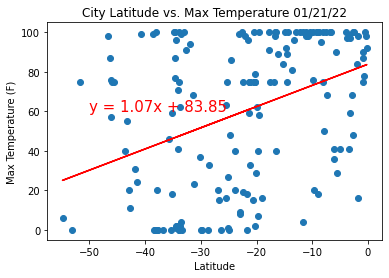

In [37]:
# To DO: Why didn't Title Update
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

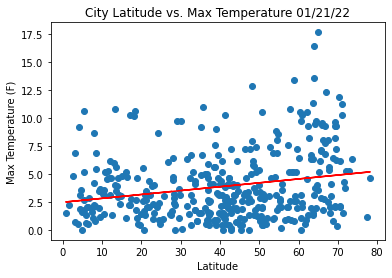

In [40]:
# To DO: Why didn't Title Update
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

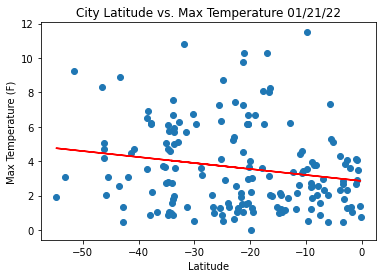

In [43]:
# To DO: Why didn't Title Update
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))